In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib as plt
import seaborn as sns

from itertools import product
from collections import Counter

In [2]:
from scripts.data_processing import GameResponses, Demographics

In [3]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account
cred = credentials.Certificate('E:/Behavioural cybersecurity/project-notes/cards-dd-game-61b9b7f26a6e.json')
firebase_admin.initialize_app(cred)

db = firestore.client()

subjects_ref = db.collection(u'subjects')

In [ ]:
# ########### TMP ###############
# uuids = [
#     '6108512871ec370e525ef4f0', # 32
# '611e717148e6b271f0b70d6f', # 31
# '5f415bea2ba0682e7fc98fbf', # 31
# '611e6e0371738becff3551d8', # 22
# '6112b4cdd72db936075c0db8', # 21
# '611e4e160f41977f737035ef', # 21
# '60ff0201788cef38c8695833', # 12
# '6115e7dcd6cecc981dde3ed6', # 12
# '611e28b12a630ff00cc467a8' # 11
# ]

In [ ]:
# uuids = [ # corrected same players condition
#     '54b9acd9fdf99b34ce2578f9',
#     '61017dbbf8b1afba48b7822e',
#     '6116aa4d3c4d9eae26b66171',
#     '6109b8238588407db4764ec1',
#     '611841738f4e8342f5ba3765',
#     '6108649840bf2b927ef3905c',
#     '5f4f8e8f9213e9056223e128',
#     '613290e8a4520dd8d0cc061a',
#     '61217de916b53da848302312',
#     '61338d61ed3f2e3d196fa7c7'
# ]

uuids = [ # different players condition
    '61005d2e9b8bac27eba5b984',
'610995bd91de0e899effd73d',
'599186630675b100014daddd',
'6119884fd696463d717432c9',
'610bb05be2e705f3e47e87fb',
'610824959b488e57fa8a4a33',
'60f0937892bd49086d6e2a77',
'5cf656e90acc8f000147f643',
'5fe292a28fd71dea34d04453',
'5d341b57a48ae7000114152a'
]

In [152]:
uuids = [
    "6110e7ae08023ecb9207b05e",
"5fec7577ad8fbadf15cd5607",
"615f1500b60d25e2660e8644",
"615ec4f34cb81d7e58fa144c",
"5cd5fe480f0de600018e7251",
"60f44f7a57468d4e9f87fa5b",
"6160011304f5319ece189bfa",
"5af196e1e1b5b8000148ac76",
"6154284fc5154abb9a264b0c",
"6147d726fa94eb7d5c2de156",
"6160403f5164508979e6358d",
"56210effed6e5a000ac7f3a5",
"6156ee007bdef87eb5b4aeb0",
"61085b8ec672d0e88151d5ae",
    "57313ba2070de6000f43384e",
    "615d9f86fdd5e127d783e850",
"614f23537aab4e64abfd53ae",
"61533356ce435e5a4a4addd0",
"6152218517a89c5b41e18a06",
"615f0726cbd12330a2d82556"
]

In [5]:
len(uuids) #== len(set(uuids))

20

### inspect main game responses

In [6]:
ttt = []

for uuid in uuids:
    ttt.append(subjects_ref.document(uuid).get())

In [7]:
condition = {}

for i, uuid in enumerate(uuids):
    cond = ttt[i].to_dict()['condition']
    condition[uuids[i]] = cond

In [8]:
condition

{'6110e7ae08023ecb9207b05e': 't1',
 '5fec7577ad8fbadf15cd5607': 't3',
 '615f1500b60d25e2660e8644': 't5',
 '615ec4f34cb81d7e58fa144c': 't6',
 '5cd5fe480f0de600018e7251': 't7',
 '60f44f7a57468d4e9f87fa5b': 't8',
 '6160011304f5319ece189bfa': 't10',
 '5af196e1e1b5b8000148ac76': 't9',
 '6154284fc5154abb9a264b0c': 't2',
 '6147d726fa94eb7d5c2de156': 't4',
 '6160403f5164508979e6358d': 't11',
 '56210effed6e5a000ac7f3a5': 't13',
 '6156ee007bdef87eb5b4aeb0': 't14',
 '61085b8ec672d0e88151d5ae': 't15',
 '57313ba2070de6000f43384e': 't12',
 '615d9f86fdd5e127d783e850': 't17',
 '614f23537aab4e64abfd53ae': 't17',
 '61533356ce435e5a4a4addd0': 't11',
 '6152218517a89c5b41e18a06': 't16',
 '615f0726cbd12330a2d82556': 't10'}

In [153]:
# game task responses query reference
refs_block1 = []

for uuid in uuids:
    refs_block1.append(subjects_ref.document(uuid).collection(u'responses').document('game_block1').get())

In [154]:
# game task responses query reference
refs_block2 = []

for uuid in uuids:
    refs_block2.append(subjects_ref.document(uuid).collection(u'responses').document('game_block2').get())

In [155]:
# game task responses query reference
refs_block3 = []

for uuid in uuids:
    refs_block3.append(subjects_ref.document(uuid).collection(u'responses').document('game_block3').get())

In [12]:
# card values
transdict = {'blue': 1, 'red': -1}

### process main response data per user

In [189]:
honesty_ratings = []
RT_ratings = []

rand_pick_col = []
reported_col = []

pp_lied = []

n_red = []
other_outcome = []

trial_result = []

catch_ratings = {}

for i, uuid in enumerate(uuids):
    print(i)
    block1_resp = GameResponses.from_dict(refs_block1[i].to_dict())
    block2_resp = GameResponses.from_dict(refs_block2[i].to_dict())
    block3_resp = GameResponses.from_dict(refs_block3[i].to_dict())
    
    i_catch = [int(numeric_string) for numeric_string in block1_resp.catchRating]
    i_catch.extend([int(numeric_string) for numeric_string in block2_resp.catchRating])
    i_catch.extend([int(numeric_string) for numeric_string in block3_resp.catchRating])
    catch_ratings[uuid] = i_catch
    
    i_honesty_ratings = [int(numeric_string) for numeric_string in block1_resp.honestyRating]
    i_honesty_ratings.extend([int(numeric_string) for numeric_string in block2_resp.honestyRating])
    i_honesty_ratings.extend([int(numeric_string) for numeric_string in block3_resp.honestyRating])
    honesty_ratings.append(i_honesty_ratings)
    
    i_pick = [transdict[x] for x in block1_resp.randomPickColour]
    i_pick.extend([transdict[x] for x in block2_resp.randomPickColour])
    i_pick.extend([transdict[x] for x in block3_resp.randomPickColour])
    rand_pick_col.append(i_pick)
    
    i_report = [x for x in block1_resp.reportColour]
    i_report.extend([x for x in block2_resp.reportColour])
    i_report.extend([x for x in block3_resp.reportColour])
    reported_col.append(i_report)
    
    i_nred = [x for x in block1_resp.nRed]
    i_nred.extend([x for x in block2_resp.nRed])
    i_nred.extend([x for x in block3_resp.nRed])
    n_red.append(i_nred)
    
    i_outcome = [x for x in block1_resp.otherReport]
    i_outcome.extend([x for x in block2_resp.otherReport])
    i_outcome.extend([x for x in block3_resp.otherReport])
    other_outcome.append(i_outcome)
    
    i_pplied = [x for x in block1_resp.ppLied]
    i_pplied.extend([x for x in block2_resp.ppLied])
    i_pplied.extend([x for x in block3_resp.ppLied])
    pp_lied.append(i_pplied)
    
    i_RT_ratings = [int(numeric_string) for numeric_string in block1_resp.RThonesty]
    i_RT_ratings.extend([int(numeric_string) for numeric_string in block2_resp.RThonesty])
    i_RT_ratings.extend([int(numeric_string) for numeric_string in block3_resp.RThonesty])
    RT_ratings.append(i_RT_ratings)
    
    i_win = [x for x in block1_resp.results]
    i_win.extend([x for x in block2_resp.results])
    i_win.extend([x for x in block3_resp.results])
    trial_result.append(i_win)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [190]:
catch_ratings

{'6110e7ae08023ecb9207b05e': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '5fec7577ad8fbadf15cd5607': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '615f1500b60d25e2660e8644': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '615ec4f34cb81d7e58fa144c': [4, 3, 0, 3, 3, 0, 4, 3, 0],
 '5cd5fe480f0de600018e7251': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '60f44f7a57468d4e9f87fa5b': [1, 1, 0, 1, 2, 3, 0, 3, 3],
 '6160011304f5319ece189bfa': [4, 3, 1, 4, 3, 0, 4, 3, 0],
 '5af196e1e1b5b8000148ac76': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '6154284fc5154abb9a264b0c': [1, 2, 4, 1, 2, 5, 1, 2, 5],
 '6147d726fa94eb7d5c2de156': [4, 3, 0, 4, 3, 4, 4, 3, 0],
 '6160403f5164508979e6358d': [4, 3, 2, 5, 3, 0, 2, 3, 0],
 '56210effed6e5a000ac7f3a5': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '6156ee007bdef87eb5b4aeb0': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '61085b8ec672d0e88151d5ae': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '57313ba2070de6000f43384e': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '615d9f86fdd5e127d783e850': [4, 2, 3, 3, 2, 3, 4, 3, 0],
 '614f23537aab4e64abfd53ae': [4, 3, 0, 4, 3, 0, 4, 3, 0],
 '61533356ce43

In [158]:
when_lied = {}

for i, uuid in enumerate(uuids):
    lies = [1 if x!=y else 0 for x, y in zip(rand_pick_col[i], reported_col[i])]
    when_lied[uuid] = lies

In [159]:
when_lied

{'6110e7ae08023ecb9207b05e': [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 '5fec7577ad8fbadf15cd5607': [1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 '615f1500b60d25e2660e8644': [0,
  0,
  0,

In [160]:
RT_hr = {}

for i, uuid in enumerate(uuids):
    RT_hr[uuid] = RT_ratings[i]

In [161]:
from scipy.stats import spearmanr, pearsonr

for i, uuid in enumerate(uuids):
    print(spearmanr(honesty_ratings[i], RT_hr[uuid]))

SpearmanrResult(correlation=-0.29864519321528843, pvalue=0.0042477973904126685)
SpearmanrResult(correlation=-0.15754101955602315, pvalue=0.13808741437091063)
SpearmanrResult(correlation=-0.028357892108100927, pvalue=0.7907634514739853)
SpearmanrResult(correlation=0.18414933920099494, pvalue=0.08230499747432378)
SpearmanrResult(correlation=0.037355256737444636, pvalue=0.7266753963343557)
SpearmanrResult(correlation=-0.3637911169492974, pvalue=0.00042418382015095834)
SpearmanrResult(correlation=0.1561896228349588, pvalue=0.14154253510084847)
SpearmanrResult(correlation=-0.21106227193424112, pvalue=0.045838302325468434)
SpearmanrResult(correlation=0.030834429040935123, pvalue=0.772963505830236)
SpearmanrResult(correlation=-0.2521746639233051, pvalue=0.01649448251074156)
SpearmanrResult(correlation=0.00044810508398698904, pvalue=0.9966555380891089)
SpearmanrResult(correlation=0.016396316509380233, pvalue=0.8780946191652081)
SpearmanrResult(correlation=-0.2189051517296139, pvalue=0.03818156

In [19]:
pearsonr([i for r in RT_ratings for i in r], [i for r in honesty_ratings for i in r])

(-0.029173282459141758, 0.21604214581823605)

<AxesSubplot:>

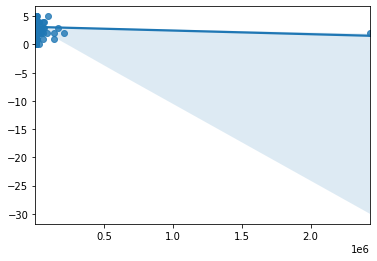

In [20]:
sns.regplot(x=[i for r in RT_ratings for i in r], y=[i for r in honesty_ratings for i in r])

In [ ]:
# with open('fr_batch1_RT_honesty_rating.json', 'w') as f:
#     json.dump(RT_hr, f)

In [ ]:
# with open('fr_batch1_RT_honesty_rating.json', 'w') as f:
#     json.dump(RT_hr, f)

In [ ]:
# with open('fr_batch1_when_lied.json', 'w') as f:
#     json.dump(when_lied, f)

In [162]:
colour_report = {}

for i, uuid in enumerate(uuids):
    colour_report[uuid] = reported_col[i]

In [163]:
colour_picked = {}

for i, uuid in enumerate(uuids):
    colour_picked[uuid] = rand_pick_col[i]

In [164]:
pp_lies = {}

for i, uuid in enumerate(uuids):
    pp_lies[uuid] = pp_lied[i]

In [165]:
win_lose_tie = {}

for i, uuid in enumerate(uuids):
    win_lose_tie[uuid] = trial_result[i]

In [166]:
other_reports = {}

for i, uuid in enumerate(uuids):
    other_reports[uuid] = other_outcome[i]

In [167]:
nreds = {}

for i, uuid in enumerate(uuids):
    nreds[uuid] = n_red[i]

In [73]:
for uuid in uuids:
    df = pd.DataFrame({
        'PID': uuid,
        'n_red': nreds[uuid],
        'outcome': other_reports[uuid],
        'col_reported': colour_report[uuid],
        'col_picked': colour_picked[uuid],
        'pp_lied': pp_lies[uuid],
        'RT_rating': RT_hr[uuid],
        'win_lose_tie': win_lose_tie[uuid],
        'suspicion_rating': tmp[uuid]
    })
#     print(df)
    df.to_feather("./data/fr/fr_batch1_"+uuid+".feather")

In [ ]:
# with open('fr_batch1_win_lose_tie.json', 'w') as f:
#     json.dump(win_lose_tie, f)

In [ ]:
# with open('fr_batch1_reported_col.json', 'w') as f:
#     json.dump(colour_report, f)

In [ ]:
# with open('fr_batch1_picked_col.json', 'w') as f:
#     json.dump(colour_picked, f)

In [ ]:
# with open('fr_batch1_pp_lies.json', 'w') as f:
#     json.dump(pp_lies, f)

In [ ]:
# with open('fr_batch1_other_reports.json', 'w') as f:
#     json.dump(other_reports, f)

In [ ]:
# with open('fr_batch1_n_red.json', 'w') as f:
#     json.dump(nreds, f)

In [168]:
# lie proportion per user
lie_prop = {}
avg_honesty_rating = {}

for i, uuid in enumerate(uuids):
    i_lie_prop = sum([x != y for x, y in zip(rand_pick_col[i], reported_col[i])])/90
    i_avg_rating = sum(honesty_ratings[i])/len(honesty_ratings[i])
    print(i_lie_prop, i_avg_rating)
    lie_prop[uuid] = i_lie_prop
    avg_honesty_rating[uuid] = i_avg_rating

0.022222222222222223 3.2222222222222223
0.23333333333333334 3.7555555555555555
0.24444444444444444 3.2222222222222223
0.0 3.188888888888889
0.4111111111111111 3.4
0.6 2.4555555555555557
0.03333333333333333 3.6777777777777776
0.2222222222222222 2.922222222222222
0.13333333333333333 2.7888888888888888
0.25555555555555554 3.8555555555555556
0.022222222222222223 3.7111111111111112
0.6222222222222222 1.4555555555555555
0.6555555555555556 2.7
0.2111111111111111 3.466666666666667
0.2111111111111111 3.7555555555555555
0.14444444444444443 2.7333333333333334
0.011111111111111112 2.922222222222222
0.5111111111111111 3.433333333333333
0.1111111111111111 2.9555555555555557
0.14444444444444443 2.522222222222222


In [149]:
# with open("./data/fr/fr_batch1_mean_honesty_rating.json", "w", encoding="utf-8") as f:
#     json.dump(avg_honesty_rating, f)

In [170]:
# with open("./data/fr/fr_batch1_lie_prop.json", "w", encoding="utf-8") as f:
#     json.dump(lie_prop, f)

<AxesSubplot:>

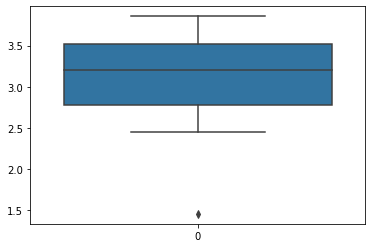

In [28]:
sns.boxplot(data=avg_honesty_rating)

In [29]:
# lie proportion per user
lie_prop_b1 = []
avg_honesty_rating_b1 = []

for i in range(len(uuids)):
    i_lie_prop = sum([x != y for x, y in zip(rand_pick_col[i][:30], reported_col[i][:30])])/30
    i_avg_rating = sum(honesty_ratings[i][:30])/len(honesty_ratings[i][:30])
    print(i_lie_prop, i_avg_rating)
    
    lie_prop_b1.append(i_lie_prop)
    avg_honesty_rating_b1.append(i_avg_rating)

0.06666666666666667 3.1666666666666665
0.23333333333333334 3.8666666666666667
0.13333333333333333 3.1333333333333333
0.0 3.533333333333333
0.1 3.466666666666667
0.5 2.7666666666666666
0.03333333333333333 3.433333333333333
0.23333333333333334 3.2
0.26666666666666666 2.466666666666667
0.16666666666666666 4.233333333333333
0.03333333333333333 3.533333333333333
0.6666666666666666 1.4
0.7 3.4
0.1 4.4
0.36666666666666664 3.7666666666666666
0.2 2.566666666666667
0.03333333333333333 2.966666666666667
0.4666666666666667 2.8
0.06666666666666667 2.3666666666666667
0.16666666666666666 2.2666666666666666


In [30]:
# lie proportion per user
lie_prop_b2 = []
avg_honesty_rating_b2 = []

for i in range(len(uuids)):
    i_lie_prop = sum([x != y for x, y in zip(rand_pick_col[i][30:60], reported_col[i][30:60])])/30
    i_avg_rating = sum(honesty_ratings[i][30:60])/len(honesty_ratings[i][30:60])
    print(i_lie_prop, i_avg_rating)
    
    lie_prop_b2.append(i_lie_prop)
    avg_honesty_rating_b2.append(i_avg_rating)

0.0 3.033333333333333
0.3 3.5
0.3333333333333333 2.7666666666666666
0.0 3.0
0.5333333333333333 3.3333333333333335
0.7333333333333333 1.9666666666666666
0.06666666666666667 3.9
0.3333333333333333 2.6666666666666665
0.1 2.533333333333333
0.26666666666666666 3.9
0.0 3.7333333333333334
0.5666666666666667 1.3333333333333333
0.6 2.2
0.3333333333333333 1.9
0.0 4.0
0.1 2.8333333333333335
0.0 2.7666666666666666
0.5333333333333333 3.566666666666667
0.1 3.066666666666667
0.1 3.033333333333333


In [31]:
# lie proportion per user
lie_prop_b3 = []
avg_honesty_rating_b3 = []

for i in range(len(uuids)):
    i_lie_prop = sum([x != y for x, y in zip(rand_pick_col[i][60:], reported_col[i][60:])])/30
    i_avg_rating = sum(honesty_ratings[i][60:])/len(honesty_ratings[i][60:])
    print(i_lie_prop, i_avg_rating)
    
    lie_prop_b3.append(i_lie_prop)
    avg_honesty_rating_b3.append(i_avg_rating)

0.0 3.466666666666667
0.16666666666666666 3.9
0.26666666666666666 3.7666666666666666
0.0 3.033333333333333
0.6 3.4
0.5666666666666667 2.6333333333333333
0.0 3.7
0.1 2.9
0.03333333333333333 3.3666666666666667
0.3333333333333333 3.433333333333333
0.03333333333333333 3.8666666666666667
0.6333333333333333 1.6333333333333333
0.6666666666666666 2.5
0.2 4.1
0.26666666666666666 3.5
0.13333333333333333 2.8
0.0 3.033333333333333
0.5333333333333333 3.933333333333333
0.16666666666666666 3.433333333333333
0.16666666666666666 2.2666666666666666


In [32]:
from scipy.stats import spearmanr, pearsonr

In [33]:
spearmanr(lie_prop_b1, avg_honesty_rating_b1)

SpearmanrResult(correlation=-0.27536874572089187, pvalue=0.23996173780335484)

In [34]:
spearmanr(lie_prop_b2, avg_honesty_rating_b2)

SpearmanrResult(correlation=-0.48706907471501815, pvalue=0.02939893449263607)

In [35]:
spearmanr(lie_prop_b3, avg_honesty_rating_b3)

SpearmanrResult(correlation=-0.16502881206474737, pvalue=0.48686698209929)

In [36]:
spearmanr(lie_prop, avg_honesty_rating)

SpearmanrResult(correlation=-0.16880180859080632, pvalue=0.4768194515991475)

In [37]:
pearsonr(lie_prop, avg_honesty_rating)

(-0.43723163803359466, 0.05388266949815907)

In [49]:
honesty_ratings

[[3,
  3,
  3,
  2,
  3,
  4,
  4,
  4,
  3,
  3,
  2,
  4,
  3,
  4,
  4,
  5,
  5,
  4,
  5,
  4,
  4,
  2,
  1,
  2,
  1,
  3,
  3,
  4,
  2,
  1,
  4,
  4,
  3,
  2,
  1,
  1,
  0,
  4,
  3,
  4,
  3,
  4,
  3,
  2,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  3,
  3,
  2,
  3,
  3,
  1,
  3,
  4,
  3,
  2,
  3,
  3,
  3,
  2,
  3,
  2,
  3,
  3,
  2,
  2,
  3,
  3,
  4,
  3,
  4,
  5,
  4,
  5,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  4,
  4],
 [5,
  5,
  4,
  5,
  5,
  5,
  2,
  4,
  0,
  0,
  4,
  5,
  5,
  5,
  5,
  1,
  5,
  5,
  5,
  3,
  4,
  2,
  4,
  5,
  4,
  3,
  4,
  3,
  5,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  4,
  4,
  3,
  1,
  3,
  2,
  3,
  3,
  5,
  2,
  5,
  4,
  3,
  1,
  3,
  4,
  3,
  4,
  4,
  4,
  2,
  4,
  3,
  3,
  5,
  5,
  3,
  4,
  4,
  4,
  5,
  4,
  4,
  5,
  4,
  2,
  4,
  3,
  3,
  5,
  1,
  2,
  5,
  3,
  5,
  4,
  5,
  5,
  5,
  3,
  4,
  4,
  4],
 [4,
  1,
  1,
  4,
  4,
  0,
  5,
  1,
  4,
  5,
  4,
  1,
  4,
  5,
  0,
  4,
  1,
  1,
  4,
  4

In [68]:
norm_honesty_ratings = []

for ratings in honesty_ratings:
    normed = [v/5 for v in ratings]
    norm_honesty_ratings.append(normed)

In [69]:
norm_honesty_ratings

[[0.6,
  0.6,
  0.6,
  0.4,
  0.6,
  0.8,
  0.8,
  0.8,
  0.6,
  0.6,
  0.4,
  0.8,
  0.6,
  0.8,
  0.8,
  1.0,
  1.0,
  0.8,
  1.0,
  0.8,
  0.8,
  0.4,
  0.2,
  0.4,
  0.2,
  0.6,
  0.6,
  0.8,
  0.4,
  0.2,
  0.8,
  0.8,
  0.6,
  0.4,
  0.2,
  0.2,
  0.0,
  0.8,
  0.6,
  0.8,
  0.6,
  0.8,
  0.6,
  0.4,
  0.6,
  0.8,
  0.8,
  0.8,
  0.8,
  0.8,
  0.8,
  0.8,
  0.8,
  0.6,
  0.6,
  0.4,
  0.6,
  0.6,
  0.2,
  0.6,
  0.8,
  0.6,
  0.4,
  0.6,
  0.6,
  0.6,
  0.4,
  0.6,
  0.4,
  0.6,
  0.6,
  0.4,
  0.4,
  0.6,
  0.6,
  0.8,
  0.6,
  0.8,
  1.0,
  0.8,
  1.0,
  0.8,
  0.8,
  0.8,
  0.8,
  0.8,
  1.0,
  1.0,
  0.8,
  0.8],
 [1.0,
  1.0,
  0.8,
  1.0,
  1.0,
  1.0,
  0.4,
  0.8,
  0.0,
  0.0,
  0.8,
  1.0,
  1.0,
  1.0,
  1.0,
  0.2,
  1.0,
  1.0,
  1.0,
  0.6,
  0.8,
  0.4,
  0.8,
  1.0,
  0.8,
  0.6,
  0.8,
  0.6,
  1.0,
  0.8,
  0.8,
  0.8,
  0.8,
  0.8,
  1.0,
  1.0,
  1.0,
  0.8,
  0.8,
  0.6,
  0.2,
  0.6,
  0.4,
  0.6,
  0.6,
  1.0,
  0.4,
  1.0,
  0.8,
  0.6,
  0.2,
  0.6,
  0.8

In [70]:
import numexpr

norm_suspicion_ratings = numexpr.evaluate('(1 - norm_honesty_ratings)')

In [71]:
norm_suspicion_ratings

array([[0.4, 0.4, 0.4, ..., 0. , 0.2, 0.2],
       [0. , 0. , 0.2, ..., 0.2, 0.2, 0.2],
       [0.2, 0.8, 0.8, ..., 0.2, 0.6, 0.4],
       ...,
       [0.4, 0.4, 0.4, ..., 0.4, 0. , 0. ],
       [0.4, 0.2, 0.6, ..., 0.2, 0.8, 0.4],
       [0.4, 0.2, 0.6, ..., 0.6, 0.6, 0. ]])

In [72]:
tmp = {uuids[i]: ratings for i, ratings in enumerate(norm_suspicion_ratings)}

# pd.DataFrame(tmp).to_json('fr_batch1_normalized_suspicion_ratings.json')

In [43]:
len(tmp)

20

In [ ]:
for i in range(len(uuids)):
    p=sns.lineplot(x=norm_suspicion_ratings[i], y=RT_ratings[i])
    p.set(xlabel="normalized suspicion rating", ylabel="RT honesty rating")

In [ ]:
diff_s_ev_alpha = [
    0.74,
0.3,
0,
0.33,
0.05,
0.3,
0.34,
0.36,
0.6,
0.67]

diff_s_ev_prior = [
    0,
0.11,
0.48,
0.18,
0.42,
0.05,
0.25,
0,
0,
0]

In [100]:
# inspect block order effects

def mean(x):
    return sum(x)/len(x)

In [ ]:
from statistics import median

In [ ]:
s_ev_alpha_hmedian = [1 if v > median(diff_s_ev_alpha) else 0 for v in diff_s_ev_alpha]

In [ ]:
s_ev_prior_hmedian = [1 if v > median(diff_s_ev_prior) else 0 for v in diff_s_ev_prior]

In [ ]:
mean_hrs = []

for ratings in norm_suspicion_ratings:
    mean_hrs.append(sum(ratings)/len(ratings))

In [ ]:
tmp = pd.DataFrame({"higher_than_median": s_ev_alpha_hmedian, 
                    "mean_normed_suspicion_rating": mean_hrs,
                    "lied_more": [v > median(lie_prop) for v in lie_prop],
                    "diff_s_ev_alpha": diff_s_ev_alpha, "diff_s_ev_prior": diff_s_ev_prior, "s_ev_prior_hmedian": s_ev_prior_hmedian, "lie_prop": lie_prop})

In [ ]:
tmp = [v > median(lie_prop) for v in lie_prop]
p = sns.barplot(x=tmp, y=mean_hrs)
p.set(xlabel="lied more than median lie proportion", ylabel="mean suspicion")
# p.set_title("SAME condition: liars and mean suspicion")

In [ ]:
p = sns.barplot(data=tmp, y="lie_prop", x="higher_than_median")
p.set(xlabel="alpha higher than median (1) or not (0)", ylabel="lie proportion")
p.set_title("DIFF condition signed EV model w/o update rule: high vs low alpha and lie proportion")

In [ ]:
p = sns.barplot(data=tmp, y="lie_prop", x="s_ev_prior_hmedian")
p.set(xlabel="baseline suspicion (prior) higher than median (1) or not (0)", ylabel="lie proportion")
p.set_title("DIFF condition signed EV model w/o update rule: high vs low prior and lying")

[Text(0.5, 0, 'lie proportion'), Text(0, 0.5, 'mean honesty rating')]

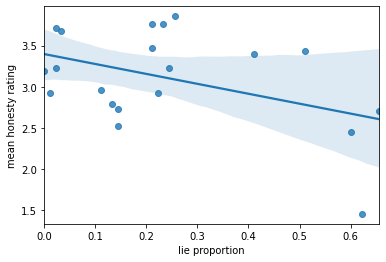

In [178]:
tmp = pd.DataFrame({'lie_prop': lie_prop, 'avg_hr': avg_honesty_rating})

p = sns.regplot(data=tmp, x='lie_prop', y='avg_hr')
p.set(xlabel="lie proportion", ylabel="mean honesty rating")
# p.set_title("DIFF condition")

In [ ]:
avg_nolie_block_ratings = []
avg_lie33_block_ratings = []
avg_lie50_block_ratings = []

sd_nolie_block_ratings = []
sd_lie33_block_ratings = []
sd_lie50_block_ratings = []

for i, uuid in enumerate(uuids):
    if condition[uuid] == "11":
        nolie = tmp[uuid][:30]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
        
        lie33 = tmp[uuid][30:60]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][60:]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
        
    if condition[uuid] == "12":
        nolie = tmp[uuid][:30]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
        
        lie33 = tmp[uuid][60:]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][30:60]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
        
    if condition[uuid] == "21":
        nolie = tmp[uuid][30:60]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
        
        lie33 = tmp[uuid][:30]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][60:]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
        
    if condition[uuid] == "22":
        nolie = tmp[uuid][60:]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
        
        lie33 = tmp[uuid][:30]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][30:60]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
        
    if condition[uuid] == "31":
        nolie = tmp[uuid][30:60]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
        
        lie33 = tmp[uuid][60:]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][:30]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
    if condition[uuid] == "32":
        nolie = tmp[uuid][60:]
        avg_nolie_block_ratings.append(mean(nolie))
        sd_nolie_block_ratings.append(np.std(nolie))
#         print(i, "mean honesty rating", mean(nolie))
#         print(i, "SD honesty rating", np.std(nolie))
                
        lie33 = tmp[uuid][30:60]
        avg_lie33_block_ratings.append(mean(lie33))
        sd_lie33_block_ratings.append(np.std(lie33))
        
        lie50 = tmp[uuid][:30]
        avg_lie50_block_ratings.append(mean(lie50))
        sd_lie50_block_ratings.append(np.std(lie50))
    else:
        pass

In [ ]:
block_lieorder_avg_ratings = list(zip(avg_nolie_block_ratings, avg_lie33_block_ratings, avg_lie50_block_ratings))

In [ ]:
block_lieorder_sd_ratings = list(zip(sd_nolie_block_ratings, sd_lie33_block_ratings, sd_lie50_block_ratings))

In [ ]:
from scipy.stats import chisquare

In [ ]:
chisquare(avg_nolie_block_ratings)

In [ ]:
chisquare(avg_lie33_block_ratings)

In [ ]:
chisquare(avg_lie50_block_ratings)

In [ ]:
avg_nolie_block_ratings

In [ ]:
#     i_report_honesty = np.array([transdict[x] for x in block1_resp.randomPickColour]) != block1_resp.reportColour
#     i_report_honesty.extend(np.array([transdict[x] for x in block2_resp.randomPickColour]) != block2_resp.reportColour)
#     i_report_honesty.extend(np.array([transdict[x] for x in block3_resp.randomPickColour]) != block3_resp.reportColour)
#     if_lied.append(i_report_honesty)

### inspect demographics data

In [84]:
# demographics survey query reference
refs_demographics = []
for uuid in uuids:
    refs_demographics.append(subjects_ref.document(uuid).collection(u'responses').document('demographics').get())

In [85]:
edlev = {}

for i, feedback in enumerate(refs_demographics):
    if feedback.to_dict() is None:
        continue
    print(i, feedback.to_dict()['edlev'])
    edlev[uuids[i]] = int(feedback.to_dict()['edlev'])

0 3
1 6
2 5
3 3
4 3
5 5
6 3
7 9
8 5
9 2
10 3
11 5
12 6
13 8
14 1
15 3
16 5
17 3
18 5
19 2


In [86]:
age = {}

for i, feedback in enumerate(refs_demographics):
    if feedback.to_dict() is None:
        continue
    print(i, feedback.to_dict()['age'])
    age[uuids[i]]=int(feedback.to_dict()['age'])

0 22
1 25
2 28
3 24
4 28
5 20
6 23
7 31
8 28
9 23
10 19
11 38
12 41
13 23
14 38
15 32
16 32
17 19
18 22
19 19


In [91]:
gender = {}

for i, feedback in enumerate(refs_demographics):
    print(i, feedback.to_dict()['gender'])
    gender[uuids[i]] = feedback.to_dict()['gender']

0 female
1 male
2 male
3 male
4 female
5 female
6 female
7 male
8 male
9 male
10 male
11 male
12 male
13 female
14 female
15 female
16 female
17 male
18 male
19 male


In [92]:
with open("fr_batch1_age.json", "w", encoding="utf-8") as f:
    json.dump(age, f)

In [93]:
with open("fr_batch1_gender.json", "w", encoding="utf-8") as f:
    json.dump(gender, f)

In [94]:
with open("fr_batch1_edlev.json", "w", encoding="utf-8") as f:
    json.dump(edlev, f)

### inspect EQ scores

In [95]:
# EQ survey query reference
refs_eq = []

for uuid in uuids:
    refs_eq.append(subjects_ref.document(uuid).collection(u'responses').document('EQ').get())

In [96]:
eq_items_r = [
    "I find it hard to know what to do in a social situation",
    "I often find it difficult to judge if something is rude or polite",
    "In a conversation I tend to focus on my own thoughts rather than on what my listener might be thinking",
    "It is hard for me to see why some things upset people so much", 
    "I can’t always see why someone should have felt offended by a remark",
    "Other people often say that I am insensitive though I don’t always see why"
]

eq_items = ["I can easily tell if someone else wants to enter a conversation",
            "I really enjoy caring for other people",
            "I can pick up quickly if someone says one thing but means another",
            "I find it easy to put myself in somebody else’s shoes",
            "I am good at predicting how someone will feel",
            "I am quick to spot when someone in a group is feeling awkward or uncomfortable",
            "I don’t tend to find social situations confusing",
            "Other people tell me I am good at understanding how they are feeling and what they are thinking",
            "I can easily tell if someone else is interested or bored with what I am saying",
            "Friends usually talk to me about their problems as they say that I am very understanding",
            "I can sense if I am intruding even if the other person doesn’t tell me",
            "I can tune into how someone else feels rapidly and intuitively",
            "I can easily work out what another person might want to talk about",
            "I can tell if someone is masking their true emotion",
            "I am good at predicting what someone will do",
            "I tend to get emotionally involved with a friend’s problem"
           ]

eq_catch = [
#     "Please select the middle answer option",
    "Please select the first answer option",
    "Please select the last answer option"
]

In [97]:
eq_responses = {}

for i, resp in enumerate(refs_eq):
    i_eq = []
    if resp.to_dict() is None:
        continue
    for it in eq_items:
        i_eq.append(resp.to_dict()[it])
    for jt in eq_items_r:
        ar = resp.to_dict()[jt]
        ar = numexpr.evaluate(f'(7 - ar)')
        i_eq.append(ar.item())
    eq_responses[uuids[i]] = i_eq

In [98]:
with open("fr_batch1_eq.json", "w", encoding="utf-8") as f:
    json.dump(eq_responses, f)

In [185]:
eq_catch_resp = {}

for i, resp in enumerate(refs_eq):
    if resp.to_dict() is None:
        continue
    i_eq = []
    for it in eq_catch:
        i_eq.append(resp.to_dict()[it])
    eq_catch_resp[uuids[i]] = i_eq

In [186]:
# check if people succeeded at all catch questions

eq_catch_resp

{'6110e7ae08023ecb9207b05e': [1, 7],
 '5fec7577ad8fbadf15cd5607': [1, 7],
 '615f1500b60d25e2660e8644': [1, 7],
 '615ec4f34cb81d7e58fa144c': [1, 7],
 '5cd5fe480f0de600018e7251': [1, 7],
 '60f44f7a57468d4e9f87fa5b': [2, 6],
 '6160011304f5319ece189bfa': [1, 7],
 '5af196e1e1b5b8000148ac76': [1, 7],
 '6154284fc5154abb9a264b0c': [1, 7],
 '6147d726fa94eb7d5c2de156': [1, 7],
 '6160403f5164508979e6358d': [1, 7],
 '56210effed6e5a000ac7f3a5': [1, 7],
 '6156ee007bdef87eb5b4aeb0': [1, 7],
 '61085b8ec672d0e88151d5ae': [1, 7],
 '57313ba2070de6000f43384e': [1, 7],
 '615d9f86fdd5e127d783e850': [1, 7],
 '614f23537aab4e64abfd53ae': [1, 7],
 '61533356ce435e5a4a4addd0': [1, 7],
 '6152218517a89c5b41e18a06': [1, 7],
 '615f0726cbd12330a2d82556': [1, 7]}

### RTs

In [ ]:
for i, uuid in enumerate(uuids):
    print(spearmanr(RT_ratings[i], honesty_ratings[i]))

In [ ]:
avg_RT_ratings = [sum(rt)/len(rt) for rt in RT_ratings]
spearmanr(avg_RT_ratings, lie_prop)

In [ ]:
# lied trials vs. not lied trials honesty rating RT



## Autism (AQ) scores

In [110]:
with open("../cards-deception/cards-game/src/assets/AQ.json", "r", encoding="utf-8") as f:
    aq_items = json.load(f)

In [111]:
for a in aq_items:
    print(a['item'])

I often notice small sounds when others do not.
I usually concentrate more on the whole picture, rather than the small details.
I find it easy to do more than one thing at once.
Please select the first answer option.
If there is an interruption, I can switch back to what I was doing very quickly.
I find it easy to ‘read between the lines’ when someone is talking to me.
I know how to tell if someone listening to me is getting bored.
When I’m reading a story I find it difficult to work out the characters’ intentions.
I like to collect information about categories of things (e.g., types of car, types of bird, types of train, types of plant, etc).
I find it easy to work out what someone is thinking or feeling just by looking at their face.
I find it difficult to work out people’s intentions.


In [112]:
catch = ["Please select the first answer option."]

aq_items = [
    "I often notice small sounds when others do not.",
"When I’m reading a story I find it difficult to work out the characters’ intentions.",
"I like to collect information about categories of things (e.g., types of car, types of bird, types of train, types of plant, etc).",
"I find it easy to work out what someone is thinking or feeling just by looking at their face.",
"I find it difficult to work out people’s intentions."
]

aq_items_r = [
    "I usually concentrate more on the whole picture, rather than the small details.",
"I find it easy to do more than one thing at once.",
"If there is an interruption, I can switch back to what I was doing very quickly.",
"I find it easy to ‘read between the lines’ when someone is talking to me.",
"I know how to tell if someone listening to me is getting bored."
]

In [113]:
refs_aq = []

for uuid in uuids:
    refs_aq.append(subjects_ref.document(uuid).collection(u'responses').document('AQ').get())

In [114]:
aq_responses = {}
aq_catch = {}

for i, resp in enumerate(refs_aq):
    i_aq = []
    if resp.to_dict() is None:
        continue
    for it in aq_items:
        i_aq.append(resp.to_dict()[it])
    for jt in aq_items_r:
        ar = resp.to_dict()[jt]
        ar = numexpr.evaluate(f'(5 - ar)')
        i_aq.append(ar.item())
    aq_responses[uuids[i]] = i_aq
    
    i_catch = []
    for ti in catch:
        i_catch.append(resp.to_dict()[ti])
    aq_catch[uuids[i]] = i_catch

In [115]:
aq_responses

{'6110e7ae08023ecb9207b05e': [4, 1, 3, 3, 3, 3, 2, 3, 4, 1],
 '5fec7577ad8fbadf15cd5607': [2, 2, 3, 2, 3, 2, 2, 1, 1, 1],
 '615f1500b60d25e2660e8644': [3, 1, 2, 1, 4, 2, 4, 3, 4, 3],
 '615ec4f34cb81d7e58fa144c': [4, 1, 3, 3, 2, 1, 2, 2, 1, 1],
 '5cd5fe480f0de600018e7251': [4, 2, 2, 3, 2, 3, 1, 2, 2, 2],
 '60f44f7a57468d4e9f87fa5b': [2, 3, 3, 3, 2, 2, 2, 3, 3, 2],
 '6160011304f5319ece189bfa': [3, 3, 3, 3, 3, 1, 2, 2, 2, 2],
 '5af196e1e1b5b8000148ac76': [2, 2, 3, 4, 2, 2, 4, 3, 1, 2],
 '6154284fc5154abb9a264b0c': [3, 2, 3, 2, 4, 3, 3, 3, 4, 3],
 '6147d726fa94eb7d5c2de156': [4, 2, 1, 3, 3, 3, 2, 3, 2, 1],
 '6160403f5164508979e6358d': [2, 2, 4, 2, 3, 2, 4, 2, 4, 2],
 '56210effed6e5a000ac7f3a5': [1, 4, 1, 3, 1, 1, 2, 1, 1, 2],
 '6156ee007bdef87eb5b4aeb0': [3, 2, 3, 2, 2, 2, 3, 3, 2, 3],
 '61085b8ec672d0e88151d5ae': [4, 2, 1, 3, 1, 2, 1, 1, 1, 1],
 '57313ba2070de6000f43384e': [4, 2, 3, 2, 3, 3, 3, 3, 2, 2],
 '615d9f86fdd5e127d783e850': [2, 3, 1, 3, 2, 2, 1, 3, 3, 2],
 '614f23537aab4e64abfd53

In [116]:
aq_score = {}

for uuid in uuids:
    r = aq_responses[uuid]
    bin_r = [1 if v>2 else 0 for v in r]
    sr = sum(bin_r)
    print(sr/len(r))
    aq_score[uuid] = sr/len(r)

0.7
0.2
0.6
0.3
0.3
0.5
0.5
0.4
0.8
0.5
0.4
0.2
0.5
0.2
0.6
0.4
0.9
0.3
0.2
0.5


In [117]:
aq_catch

{'6110e7ae08023ecb9207b05e': [1],
 '5fec7577ad8fbadf15cd5607': [1],
 '615f1500b60d25e2660e8644': [1],
 '615ec4f34cb81d7e58fa144c': [1],
 '5cd5fe480f0de600018e7251': [1],
 '60f44f7a57468d4e9f87fa5b': [2],
 '6160011304f5319ece189bfa': [1],
 '5af196e1e1b5b8000148ac76': [1],
 '6154284fc5154abb9a264b0c': [1],
 '6147d726fa94eb7d5c2de156': [1],
 '6160403f5164508979e6358d': [1],
 '56210effed6e5a000ac7f3a5': [1],
 '6156ee007bdef87eb5b4aeb0': [1],
 '61085b8ec672d0e88151d5ae': [1],
 '57313ba2070de6000f43384e': [1],
 '615d9f86fdd5e127d783e850': [1],
 '614f23537aab4e64abfd53ae': [1],
 '61533356ce435e5a4a4addd0': [1],
 '6152218517a89c5b41e18a06': [1],
 '615f0726cbd12330a2d82556': [1]}

In [118]:
with open("fr_batch1_aq.json", "w", encoding="utf-8") as f:
    json.dump(aq_responses, f)

In [119]:
with open("fr_batch1_aq_score.json", "w", encoding="utf-8") as f:
    json.dump(aq_score, f)

## CRT scores

In [120]:
refs_crt = []

for uuid in uuids:
    refs_crt.append(subjects_ref.document(uuid).collection(u'responses').document('CRT').get())

In [174]:
crt_responses = {}

for i, refs in enumerate(refs_crt):
    print(refs.to_dict())
    score = 0
    
    crt1 = refs.to_dict()['crt1']
    if str(5) in crt1:
        score += 1
    
    crt2 = refs.to_dict()['crt2']
    if crt2 == '5':
        score += 1
    
    crt3 = refs.to_dict()['crt3']
    if crt3 == '47':
        score += 1
    
    crt4 = refs.to_dict()['crt4']
    if ('2' in crt4) | ('second' in crt4):
        score += 1
    
    crt_responses[uuids[i]] = score

{'crt4': '', 'crt2': '100', 'crt1': '10', 'crt3': '24'}
{'crt3': '47', 'crt1': '5', 'crt4': '2', 'crt2': '5'}
{'crt4': '1', 'crt3': '24', 'crt2': '100', 'crt1': '10'}
{'crt1': '10', 'crt2': '100', 'crt3': '24', 'crt4': '2'}
{'crt3': '24', 'crt1': '10', 'crt4': 'second', 'crt2': '100'}
{'crt2': '5', 'crt4': '2', 'crt1': ' 5', 'crt3': '47'}
{'crt1': '0.05', 'crt2': '5', 'crt4': '2', 'crt3': '47'}
{'crt2': '5', 'crt3': '47', 'crt4': '1st', 'crt1': '10'}
{'crt3': '47', 'crt1': '10', 'crt4': '2nd', 'crt2': '5'}
{'crt4': '2nd', 'crt1': '5', 'crt2': '5', 'crt3': '47'}
{'crt3': '47', 'crt2': '5', 'crt1': '10', 'crt4': '2nd'}
{'crt2': '5', 'crt1': '5', 'crt3': '47', 'crt4': '2nd'}
{'crt2': '100', 'crt1': '0,10', 'crt4': 'first', 'crt3': '24'}
{'crt1': '10', 'crt4': 'second', 'crt3': '24', 'crt2': '100'}
{'crt2': '100', 'crt3': '47', 'crt1': '5', 'crt4': '2nd'}
{'crt4': '2nd', 'crt2': '20', 'crt1': '10', 'crt3': '24'}
{'crt2': '5', 'crt1': '5', 'crt4': '2', 'crt3': '47'}
{'crt4': '2nd', 'crt1': 

In [175]:
crt_responses

{'6110e7ae08023ecb9207b05e': 0,
 '5fec7577ad8fbadf15cd5607': 4,
 '615f1500b60d25e2660e8644': 0,
 '615ec4f34cb81d7e58fa144c': 1,
 '5cd5fe480f0de600018e7251': 1,
 '60f44f7a57468d4e9f87fa5b': 4,
 '6160011304f5319ece189bfa': 4,
 '5af196e1e1b5b8000148ac76': 2,
 '6154284fc5154abb9a264b0c': 3,
 '6147d726fa94eb7d5c2de156': 4,
 '6160403f5164508979e6358d': 3,
 '56210effed6e5a000ac7f3a5': 4,
 '6156ee007bdef87eb5b4aeb0': 0,
 '61085b8ec672d0e88151d5ae': 1,
 '57313ba2070de6000f43384e': 3,
 '615d9f86fdd5e127d783e850': 1,
 '614f23537aab4e64abfd53ae': 4,
 '61533356ce435e5a4a4addd0': 4,
 '6152218517a89c5b41e18a06': 3,
 '615f0726cbd12330a2d82556': 2}

In [176]:
with open("fr_batch1_crt.json", "w", encoding="utf-8") as f:
    json.dump(crt_responses, f)

## R-GPTS paranoia scores

In [124]:
with open("../cards-deception/cards-game/src/assets/RGPTS.json", "r", encoding="utf-8") as f:
    rgpts_items = json.load(f)

In [125]:
for a in rgpts_items:
    print(a['item'])

I spent time thinking about friends gossiping about me.
I often heard people referring to me.
I have been upset by friends and colleagues judging me critically.
People definitely laughed at me behind my back.
I have been thinking a lot about people avoiding me.
People have been dropping hints for me.
I believed that certain people were not what they seemed.
Please select the last answer option.
People talking about me behind my back upset me.
Certain individuals have had it in for me.
People wanted me to feel threatened, so they stared at me.
I was certain people did things in order to annoy me.
Please select the second answer option.
I was convinced there was a conspiracy against me.
I was sure someone wanted to hurt me.
I couldn’t stop thinking about people wanting to confuse me.
I was distressed by being persecuted.
It was difficult to stop thinking about people wanting to make me feel bad.
People have been hostile towards me on purpose.
I was angry that someone wanted to hurt me.


In [126]:
rgpts_items = [
    "I spent time thinking about friends gossiping about me.",
"I often heard people referring to me.",
"I have been upset by friends and colleagues judging me critically.",
"People definitely laughed at me behind my back.",
"I have been thinking a lot about people avoiding me.",
"People have been dropping hints for me.",
"I believed that certain people were not what they seemed.",
"People talking about me behind my back upset me.",
"Certain individuals have had it in for me.",
"People wanted me to feel threatened, so they stared at me.",
"I was certain people did things in order to annoy me.",
"I was convinced there was a conspiracy against me.",
"I was sure someone wanted to hurt me.",
"I couldn’t stop thinking about people wanting to confuse me.",
"I was distressed by being persecuted.",
"It was difficult to stop thinking about people wanting to make me feel bad.",
"People have been hostile towards me on purpose.",
"I was angry that someone wanted to hurt me."
]

catch = [
    "Please select the last answer option.",
    "Please select the second answer option."
]

In [127]:
refs_rgpts = []

for uuid in uuids:
    refs_rgpts.append(subjects_ref.document(uuid).collection(u'responses').document('RGPTS').get())

In [128]:
len(rgpts_items)

18

In [130]:
rgpts_responses = {}
rgpts_catch = {}

for i, resp in enumerate(refs_rgpts):
    print(i)
    if resp.to_dict() is None:
            continue
            
    try:
        i_rgpts = []
        for it in rgpts_items:
            i_rgpts.append(resp.to_dict()[it])
        rgpts_responses[uuids[i]] = i_rgpts
    
        i_catch = []
        for ti in catch:
            i_catch.append(resp.to_dict()[ti])
        rgpts_catch[uuids[i]] = i_catch
    
    except KeyError:
        print("KEY ERROR")
        continue

0
1
KEY ERROR
2
3
KEY ERROR
4
5
6
KEY ERROR
7
8
9
10
KEY ERROR
11
12
KEY ERROR
13
14
15
16
17
18
19


In [187]:
rgpts_catch

{'6110e7ae08023ecb9207b05e': [5, 2],
 '615f1500b60d25e2660e8644': [5, 2],
 '5cd5fe480f0de600018e7251': [5, 2],
 '60f44f7a57468d4e9f87fa5b': [4, 2],
 '5af196e1e1b5b8000148ac76': [5, 2],
 '6154284fc5154abb9a264b0c': [5, 2],
 '6147d726fa94eb7d5c2de156': [5, 2],
 '56210effed6e5a000ac7f3a5': [5, 2],
 '61085b8ec672d0e88151d5ae': [5, 2],
 '57313ba2070de6000f43384e': [5, 2],
 '615d9f86fdd5e127d783e850': [4, 1],
 '614f23537aab4e64abfd53ae': [4, 1],
 '61533356ce435e5a4a4addd0': [4, 1],
 '6152218517a89c5b41e18a06': [4, 1],
 '615f0726cbd12330a2d82556': [4, 1]}

In [131]:
with open("fr_batch1_rgpts.json", "w", encoding="utf-8") as f:
    json.dump(rgpts_responses, f)

## Dark triad (SD3) scores

In [132]:
with open("../cards-deception/cards-game/src/assets/SD3.json", "r", encoding="utf-8") as f:
    sd3_items = json.load(f)

In [133]:
for i in sd3_items:
    print(i['item'])

It’s not wise to tell your secrets.
I like to use clever manipulation to get my way.
Whatever it takes, you must get the important people on your side.
Please select the third answer option.
Avoid direct conflict with others because they may be useful in the future.
It’s wise to keep track of information that you can use against people later.
You should wait for the right time to get back at people.
There are things you should hide from other people to preserve your reputation.
Make sure your plans benefit yourself, not others.
Most people can be manipulated.
People see me as a natural leader.
I hate being the center of attention.
Many group activities tend to be dull without me.
I know that I am special because everyone keeps telling me so.
I like to get acquainted with important people.
I feel embarrassed if someone compliments me.
I have been compared to famous people.
I am an average person.
I insist on getting the respect I deserve.
I like to get revenge on authorities.
Please sel

In [138]:
psycho_r = ['I\xa0avoid\xa0dangerous\xa0situations.']

psycho_items = [
    'Payback\xa0needs\xa0to\xa0be\xa0quick\xa0and\xa0nasty.',
 'I\xa0like\xa0to\xa0get\xa0revenge\xa0on\xa0authorities.',
     'I\xa0insist\xa0on\xa0getting\xa0the\xa0respect\xa0I\xa0deserve.',
     'People\xa0often\xa0say\xa0I’m\xa0out\xa0of\xa0control.',
     'People\xa0who\xa0mess\xa0with\xa0me\xa0always\xa0regret\xa0it',
     'It’s\xa0true\xa0that\xa0I\xa0can\xa0be\xa0mean\xa0to\xa0others.',
    #     "I have never gotten into trouble with the law.",
# "I enjoy having sex with people I hardly know.",
# "I’ll say anything to get what I want."
]

narcis_items = [
     'I\xa0hate\xa0being\xa0the\xa0center\xa0of\xa0attention.',
         'I\xa0have\xa0been\xa0compared\xa0to\xa0famous\xa0people.',
    'I\xa0like\xa0to\xa0get\xa0acquainted\xa0with\xa0important\xa0people.',
     'Many\xa0group\xa0activities\xa0tend\xa0to\xa0be\xa0dull\xa0without\xa0me.',
     'I\xa0know\xa0that\xa0I\xa0am\xa0special\xa0because\xa0everyone\xa0keeps\xa0telling\xa0me\xa0so.',
     'People\xa0see\xa0me\xa0as\xa0a\xa0natural\xa0leader.',

]

narcis_r = [
     'I\xa0feel\xa0embarrassed\xa0if\xa0someone\xa0compliments\xa0me.',
    'I\xa0am\xa0an\xa0average\xa0person.'
]

machia_items = [
    'It’s\xa0wise\xa0to\xa0keep\xa0track\xa0of\xa0information\xa0that\xa0you\xa0can\xa0use\xa0against\xa0people\xa0later.',
     'Avoid\xa0direct\xa0conflict\xa0with\xa0others\xa0because\xa0they\xa0may\xa0be\xa0useful\xa0in\xa0the\xa0future.',
    'You\xa0should\xa0wait\xa0for\xa0the\xa0right\xa0time\xa0to\xa0get\xa0back\xa0at\xa0people.',
     'There\xa0are\xa0things\xa0you\xa0should\xa0hide\xa0from\xa0other\xa0people\xa0to\xa0preserve\xa0your\xa0reputation.',
 'Whatever\xa0it\xa0takes,\xa0you\xa0must\xa0get\xa0the\xa0important\xa0people\xa0on\xa0your\xa0side.',
    'It’s\xa0not\xa0wise\xa0to\xa0tell\xa0your\xa0secrets.',
     'Make\xa0sure\xa0your\xa0plans\xa0benefit\xa0yourself,\xa0not\xa0others.',
     'Most\xa0people\xa0can\xa0be\xa0manipulated.',
     'I\xa0like\xa0to\xa0use\xa0clever\xa0manipulation\xa0to\xa0get\xa0my\xa0way.'
]

catch = ["Please select the third answer option.",
        "Please select the last answer option."]

In [ ]:
# machia_items = [
#     "It’s not wise to tell your secrets.",
# "I like to use clever manipulation to get my way.",
# "Whatever it takes, you must get the important people on your side.",
# "Avoid direct conflict with others because they may be useful in the future.",
# "It’s wise to keep track of information that you can use against people later.",
# "You should wait for the right time to get back at people.",
# "There are things you should hide from other people to preserve your reputation.",
#     "Make sure your plans benefit yourself, not others.",
# "Most people can be manipulated."
# ]

# narcis_items = [
# "People see me as a natural leader.",
# "I hate being the center of attention.",
# "Many group activities tend to be dull without me.",
# "I know that I am special because everyone keeps telling me so.",
# "I like to get acquainted with important people.",
# "I have been compared to famous people.",
#     "I insist on getting the respect I deserve."
# ]

# narcis_r = [
#     "I feel embarrassed if someone compliments me.",
#     "I am an average person."
# ]

# psycho_items = [
# "I like to get revenge on authorities.",
# "Payback needs to be quick and nasty.",
# "People often say I’m out of control.",
# "It’s true that I can be mean to others.",
# "People who mess with me always regret it.",
#     "I have never gotten into trouble with the law.",
# "I enjoy having sex with people I hardly know.",
# "I’ll say anything to get what I want."
# ]
# psycho_r = ["I avoid dangerous situations."]

In [135]:
len(machia_items)

9

In [136]:
refs_sd3 = []

for uuid in uuids:
    refs_sd3.append(subjects_ref.document(uuid).collection(u'responses').document('SD3').get())

In [139]:
narcis_responses = {}
machia_responses = {}
psychop_responses = {}
sd3_catch = {}

for i, resp in enumerate(refs_sd3):
    i_narcis = []
    i_psycho = []
    
    if resp.to_dict() is None:
        continue
    
    try:
        i_machia = []
        for mt in machia_items:
            i_machia.append(resp.to_dict()[mt])
        machia_responses[uuids[i]] = i_machia
    except KeyError:
        print("KEYERROR")
        continue
        
    for it in narcis_items:
        i_narcis.append(resp.to_dict()[it])
    for jt in narcis_r:
        ar = resp.to_dict()[jt]
        ar = numexpr.evaluate(f'(6 - ar)')
        i_narcis.append(ar.item())
    narcis_responses[uuids[i]] = i_narcis

    for pt in psycho_items:
        i_psycho.append(resp.to_dict()[pt])
    for rt in psycho_r:
        ar = resp.to_dict()[rt]
        ar = numexpr.evaluate(f'(6 - ar)')
        i_psycho.append(ar.item())
    psychop_responses[uuids[i]] = i_psycho
    
    i_catch = []
    for ci in catch:
        i_catch.append(resp.to_dict()[ci])
    sd3_catch[uuids[i]] = i_catch

In [140]:
machia_responses

{'6110e7ae08023ecb9207b05e': [4, 2, 2, 4, 3, 5, 5, 5, 3],
 '5fec7577ad8fbadf15cd5607': [1, 3, 1, 2, 3, 4, 2, 3, 2],
 '615f1500b60d25e2660e8644': [2, 4, 2, 4, 3, 5, 2, 4, 1],
 '615ec4f34cb81d7e58fa144c': [1, 4, 1, 3, 3, 4, 1, 3, 1],
 '5cd5fe480f0de600018e7251': [4, 3, 3, 2, 3, 4, 3, 4, 3],
 '60f44f7a57468d4e9f87fa5b': [2, 5, 2, 2, 3, 2, 2, 4, 2],
 '6160011304f5319ece189bfa': [2, 2, 3, 2, 2, 4, 3, 2, 2],
 '5af196e1e1b5b8000148ac76': [2, 4, 3, 4, 4, 4, 2, 4, 3],
 '6154284fc5154abb9a264b0c': [4, 4, 4, 4, 3, 5, 2, 4, 2],
 '6147d726fa94eb7d5c2de156': [4, 2, 1, 3, 2, 4, 3, 5, 4],
 '6160403f5164508979e6358d': [2, 4, 4, 4, 2, 4, 3, 5, 1],
 '56210effed6e5a000ac7f3a5': [3, 2, 4, 2, 5, 5, 2, 5, 4],
 '6156ee007bdef87eb5b4aeb0': [4, 3, 2, 4, 2, 2, 2, 5, 3],
 '61085b8ec672d0e88151d5ae': [2, 3, 1, 3, 2, 4, 2, 5, 5],
 '57313ba2070de6000f43384e': [2, 3, 3, 4, 4, 4, 3, 5, 2],
 '615d9f86fdd5e127d783e850': [1, 4, 1, 1, 1, 2, 1, 1, 1],
 '614f23537aab4e64abfd53ae': [3, 3, 3, 3, 4, 3, 3, 4, 3],
 '61533356ce43

In [188]:
sd3_catch

{'6110e7ae08023ecb9207b05e': [3, 5],
 '5fec7577ad8fbadf15cd5607': [3, 5],
 '615f1500b60d25e2660e8644': [3, 5],
 '615ec4f34cb81d7e58fa144c': [3, 5],
 '5cd5fe480f0de600018e7251': [3, 5],
 '60f44f7a57468d4e9f87fa5b': [3, 4],
 '6160011304f5319ece189bfa': [3, 5],
 '5af196e1e1b5b8000148ac76': [3, 5],
 '6154284fc5154abb9a264b0c': [3, 5],
 '6147d726fa94eb7d5c2de156': [3, 5],
 '6160403f5164508979e6358d': [3, 5],
 '56210effed6e5a000ac7f3a5': [3, 5],
 '6156ee007bdef87eb5b4aeb0': [3, 5],
 '61085b8ec672d0e88151d5ae': [3, 5],
 '57313ba2070de6000f43384e': [3, 5],
 '615d9f86fdd5e127d783e850': [3, 5],
 '614f23537aab4e64abfd53ae': [3, 5],
 '61533356ce435e5a4a4addd0': [3, 5],
 '6152218517a89c5b41e18a06': [3, 5],
 '615f0726cbd12330a2d82556': [3, 5]}

In [141]:
with open("fr_batch1_sd3_narcis.json", "w", encoding="utf-8") as f:
    json.dump(narcis_responses, f)

In [142]:
with open("fr_batch1_sd3_machia.json", "w", encoding="utf-8") as f:
    json.dump(machia_responses, f)

In [143]:
with open("fr_batch1_sd3_psycho.json", "w", encoding="utf-8") as f:
    json.dump(psychop_responses, f)

### inspect feedback and debrief question responses

In [74]:
refs_feedback = []

for uuid in uuids:
    refs_feedback.append(subjects_ref.document(uuid).collection(u'responses').document('feedback').get())

In [75]:
for i, feedback in enumerate(refs_feedback):
    print(uuids[i], feedback.to_dict()['studyPurpose'])

6110e7ae08023ecb9207b05e It could be on how my mind operates, or when I pick and choose to be truthful to others who don't even know me, or if I wish to expose myself an be vulnerable with the truth to others.
5fec7577ad8fbadf15cd5607 Identify how certain incentives can change the decisions of people.
615f1500b60d25e2660e8644 to collect information on how well participants can read each other's emotions and intentions. 
615ec4f34cb81d7e58fa144c To discern honesty and dishonesty 
5cd5fe480f0de600018e7251 Possibly to see if someone would truthfully answer and not manipulate the results to benefit them.
60f44f7a57468d4e9f87fa5b no idea but it was interesting
6160011304f5319ece189bfa To see if people answer correctly despite whether they win or lose
5af196e1e1b5b8000148ac76 To gauge whether people's honesty is based on certain personality traits when financial gain is involved.
6154284fc5154abb9a264b0c To judge another person's character by measuring their honesty and to see if individuals

TypeError: 'NoneType' object is not subscriptable

In [76]:
for i, feedback in enumerate(refs_feedback):
    print(feedback.to_dict()['understoodTask']) #uuids[i], 

5
6
6
6
0
4
5
4
4
6
4
6
4
5
6
6
5
6


TypeError: 'NoneType' object is not subscriptable

In [77]:
for i, feedback in enumerate(refs_feedback):
    print(uuids[i], feedback.to_dict()['concerns'])

6110e7ae08023ecb9207b05e No I do not, it was explained very well, the first 3 practice runs helped understand the game a lot better and efficiently. 
5fec7577ad8fbadf15cd5607 No, not really.
615f1500b60d25e2660e8644 None
615ec4f34cb81d7e58fa144c No.
5cd5fe480f0de600018e7251 None at all.
60f44f7a57468d4e9f87fa5b no
6160011304f5319ece189bfa No
5af196e1e1b5b8000148ac76 I wasn't sure whether I was required to be honest or not when reporting the cards.
6154284fc5154abb9a264b0c The attention questions for the card game, I think I got them all wrong because sometimes I mix up my lefts and rights so I believe I did it the other way round so I apologize for that!
6147d726fa94eb7d5c2de156 Yes, I have no idea why I should ever be picking red.
6160403f5164508979e6358d No
56210effed6e5a000ac7f3a5 no concerns at all
6156ee007bdef87eb5b4aeb0 Nooo
61085b8ec672d0e88151d5ae Not really.
57313ba2070de6000f43384e No, thanks!
615d9f86fdd5e127d783e850 no
614f23537aab4e64abfd53ae The game is easy to be honest

TypeError: 'NoneType' object is not subscriptable

In [78]:
for i, feedback in enumerate(refs_feedback):
    print(uuids[i], feedback.to_dict()['yourGoal'])

6110e7ae08023ecb9207b05e To try to tell the truth as much as possible, without feeling judged.
5fec7577ad8fbadf15cd5607 Mixture of winning and being honest.
615f1500b60d25e2660e8644 to win and yet be mainly honest. 
615ec4f34cb81d7e58fa144c To have fun and earn some money 
5cd5fe480f0de600018e7251 To correctly choose the result the computer-generated and also try to win the game against other players.
60f44f7a57468d4e9f87fa5b fun and interesting 
6160011304f5319ece189bfa Tell the correct colour I got
5af196e1e1b5b8000148ac76 To complete the study and see if being dishonest would make any difference to winning or losing points.
6154284fc5154abb9a264b0c To be as honest as possible, however, when the opponent starting being dishonest, it made me be dishonest to try and score more points.
6147d726fa94eb7d5c2de156 I have no idea, I was torn between making profit and feeling bad about being dishonest with my answers. I guess my goal was to make a tiny profit whilst remaining somewhat honest.

TypeError: 'NoneType' object is not subscriptable

In [79]:
for i, feedback in enumerate(refs_feedback):
    print(uuids[i], feedback.to_dict()['othersGoal'])

6110e7ae08023ecb9207b05e they may have had the same goals as me during the game, or they could've just played the game for money or to just play it. 
5fec7577ad8fbadf15cd5607 Similar to mine, even though at times it felt like certain players valued honesty more.
615f1500b60d25e2660e8644 To win completely or to be completely honest. 
615ec4f34cb81d7e58fa144c to earn some money and help sciene. 
5cd5fe480f0de600018e7251 It's possible that their goal is to win the game against other players too.
60f44f7a57468d4e9f87fa5b probably the same 
6160011304f5319ece189bfa To win each card selection
5af196e1e1b5b8000148ac76 Perhaps similar to my own
6154284fc5154abb9a264b0c To try and score as many points as possible whilst seeming honest.
6147d726fa94eb7d5c2de156 I think all players had their own goals, despite me saying I only faced 1 other person, I think that person had the same strategy as me. Some people weren't really playing a game and were just being honest whereas others only cared about 

TypeError: 'NoneType' object is not subscriptable

In [80]:
for i, feedback in enumerate(refs_feedback):
    print(uuids[i], feedback.to_dict()['goodDetection'])

6110e7ae08023ecb9207b05e 4
5fec7577ad8fbadf15cd5607 3
615f1500b60d25e2660e8644 5
615ec4f34cb81d7e58fa144c 2
5cd5fe480f0de600018e7251 4
60f44f7a57468d4e9f87fa5b 2
6160011304f5319ece189bfa 4
5af196e1e1b5b8000148ac76 4
6154284fc5154abb9a264b0c 1
6147d726fa94eb7d5c2de156 1
6160403f5164508979e6358d 1
56210effed6e5a000ac7f3a5 5
6156ee007bdef87eb5b4aeb0 5
61085b8ec672d0e88151d5ae 4
57313ba2070de6000f43384e 1
615d9f86fdd5e127d783e850 1
614f23537aab4e64abfd53ae 3
61533356ce435e5a4a4addd0 4


TypeError: 'NoneType' object is not subscriptable

In [81]:
for i, feedback in enumerate(refs_feedback):
    print(uuids[i], feedback.to_dict()['howHonest'])

6110e7ae08023ecb9207b05e 5
5fec7577ad8fbadf15cd5607 4
615f1500b60d25e2660e8644 4
615ec4f34cb81d7e58fa144c 6
5cd5fe480f0de600018e7251 2
60f44f7a57468d4e9f87fa5b 3
6160011304f5319ece189bfa 5
5af196e1e1b5b8000148ac76 2
6154284fc5154abb9a264b0c 4
6147d726fa94eb7d5c2de156 3
6160403f5164508979e6358d 6
56210effed6e5a000ac7f3a5 3
6156ee007bdef87eb5b4aeb0 1
61085b8ec672d0e88151d5ae 4
57313ba2070de6000f43384e 2
615d9f86fdd5e127d783e850 5
614f23537aab4e64abfd53ae 4
61533356ce435e5a4a4addd0 2


TypeError: 'NoneType' object is not subscriptable

In [182]:
howmany={}
for i, feedback in enumerate(refs_feedback):
    howmany[uuids[i]] = int(feedback.to_dict()['howMany'])

TypeError: 'NoneType' object is not subscriptable

In [184]:
# with open("./data/fr/fr_batch1_howmany.json", "w", encoding="utf-8") as f:
#     json.dump(howmany, f)

In [83]:
for i, feedback in enumerate(refs_feedback):
    print(uuids[i], feedback.to_dict()['playAgain'])

6110e7ae08023ecb9207b05e 1
5fec7577ad8fbadf15cd5607 1
615f1500b60d25e2660e8644 1
615ec4f34cb81d7e58fa144c 1
5cd5fe480f0de600018e7251 1
60f44f7a57468d4e9f87fa5b 1
6160011304f5319ece189bfa 1
5af196e1e1b5b8000148ac76 1
6154284fc5154abb9a264b0c 1
6147d726fa94eb7d5c2de156 1
6160403f5164508979e6358d 0
56210effed6e5a000ac7f3a5 1
6156ee007bdef87eb5b4aeb0 1
61085b8ec672d0e88151d5ae 1
57313ba2070de6000f43384e 1
615d9f86fdd5e127d783e850 1
614f23537aab4e64abfd53ae 0
61533356ce435e5a4a4addd0 1


TypeError: 'NoneType' object is not subscriptable